[base_page](https://towardsdatascience.com/moving-averages-in-python-16170e20f6c)

In [4]:
import pandas as pd

In [44]:
!pwd

/Users/cho/git/pubJupyter/Preprocessing/timeSeries


In [82]:
df_temperature = pd.read_csv("/Users/cho/data/temperaturesbarcelonadesde1780.csv", encoding='UTF-8')
df_temperature.head()

Any  Temp_Mitjana_Gener  Temp_Mitjana_Febrer  Temp_Mitjana_Marc  \
0  1780                 6.7                  7.3               11.6   
1  1781                 7.5                  8.9               10.9   
2  1782                 8.2                  6.1                9.8   
3  1783                 8.3                  8.6                9.6   
4  1784                 7.3                  7.1               10.8   

   Temp_Mitjana_Abril  Temp_Mitjana_Maig  Temp_Mitjana_Juny  \
0                11.4               16.3               19.1   
1                13.7               16.8               18.0   
2                10.5               15.4               20.1   
3                12.4               15.0               19.1   
4                10.7               16.7               20.7   

   Temp_Mitjana_Juliol  Temp_Mitjana_Agost  Temp_Mitjana_Setembre  \
0                 21.4                22.0                   20.3   
1                 22.0                22.6                   19.1   
2                 22.3                22.6                   19.9   
3                 22.9                21.4                   18.6   
4                 22.0                20.5                   20.0   

   Temp_Mitjana_Octubre  Temp_Mitjana_Novembre  Temp_Mitjana_Desembre  
0                  16.3                    9.2                    7.3  
1                  15.0                   11.8                   10.3  
2                  13.8                    7.4                    7.5  
3                  15.5                   11.0                   10.4  
4                  13.8                    8.5                    5.3

In [83]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    241 non-null    int64  
 1   Temp_Mitjana_Gener     241 non-null    float64
 2   Temp_Mitjana_Febrer    241 non-null    float64
 3   Temp_Mitjana_Marc      241 non-null    float64
 4   Temp_Mitjana_Abril     241 non-null    float64
 5   Temp_Mitjana_Maig      241 non-null    float64
 6   Temp_Mitjana_Juny      241 non-null    float64
 7   Temp_Mitjana_Juliol    241 non-null    float64
 8   Temp_Mitjana_Agost     241 non-null    float64
 9   Temp_Mitjana_Setembre  241 non-null    float64
 10  Temp_Mitjana_Octubre   241 non-null    float64
 11  Temp_Mitjana_Novembre  241 non-null    float64
 12  Temp_Mitjana_Desembre  241 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.6 KB


In [84]:
df_rainfall = pd.read_csv('/Users/cho/data/precipitacionsbarcelonadesde1786.csv', encoding='utf-8')
df_rainfall.head()

Any  Precip_Acum_Gener  Precip_Acum_Febrer  Precip_Acum_Marc  \
0  1786               32.8                28.4              84.4   
1  1787              136.4                27.4              44.6   
2  1788                9.9                14.9              32.2   
3  1789               12.4                12.4              23.6   
4  1790               44.6                 1.2             188.5   

   Precip_Acum_Abril  Precip_Acum_Maig  Precip_Acum_Juny  Precip_Acum_Juliol  \
0               42.3               8.5              38.0                 6.8   
1               76.9               0.0              29.8                34.7   
2               12.4               7.5             146.3                59.4   
3                9.9              32.2               9.9                 6.3   
4               74.4              44.7              39.7                65.7   

   Precip_Acum_Agost  Precip_Acum_Setembre  Precip_Acum_Octubre  \
0               52.1                  62.0                 57.0   
1               14.9                 205.8                 12.4   
2               29.8                 123.9                163.6   
3               69.4                  18.7                 52.1   
4               32.3                  71.9                205.8   

   Precip_Acum_Novembre  Precip_Acum_Desembre  
0                 195.8                 114.1  
1                  42.2                   0.0  
2                 106.6                  22.3  
3                  18.7                  76.9  
4                  72.0                  14.9

In [85]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   235 non-null    int64  
 1   Precip_Acum_Gener     235 non-null    float64
 2   Precip_Acum_Febrer    235 non-null    float64
 3   Precip_Acum_Marc      235 non-null    float64
 4   Precip_Acum_Abril     235 non-null    float64
 5   Precip_Acum_Maig      235 non-null    float64
 6   Precip_Acum_Juny      235 non-null    float64
 7   Precip_Acum_Juliol    235 non-null    float64
 8   Precip_Acum_Agost     235 non-null    float64
 9   Precip_Acum_Setembre  235 non-null    float64
 10  Precip_Acum_Octubre   235 non-null    float64
 11  Precip_Acum_Novembre  235 non-null    float64
 12  Precip_Acum_Desembre  235 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.0 KB


In [86]:
df_temperature.set_index('Any', inplace=True)
df_temperature.index.name = 'year'
df_temperature['average_temperature'] = df_temperature.mean(axis=1)
df_temperature = df_temperature[['average_temperature']]

In [87]:
df_temperature.head()

average_temperature
year                     
1780            14.075000
1781            14.716667
1782            13.633333
1783            14.400000
1784            13.616667

In [88]:
df_rainfall.set_index('Any', inplace=True)
df_rainfall.index.name = 'year'
df_rainfall['accumulated_rainfall'] = df_rainfall.sum(axis=1)
df_rainfall = df_rainfall[['accumulated_rainfall']]

In [89]:
df_rainfall.head()

accumulated_rainfall
year                      
1786                 722.2
1787                 625.1
1788                 728.8
1789                 342.5
1790                 855.7

Text(0, 0.5, 'Temperature [°C]')

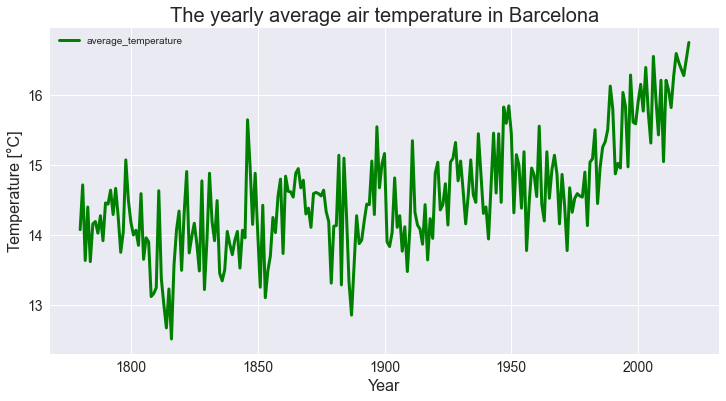

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

df_temperature.plot(color='green', linewidth = 3, figsize=(12, 6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend('')

plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)


Text(0, 0.5, 'Rainfall [mm]')

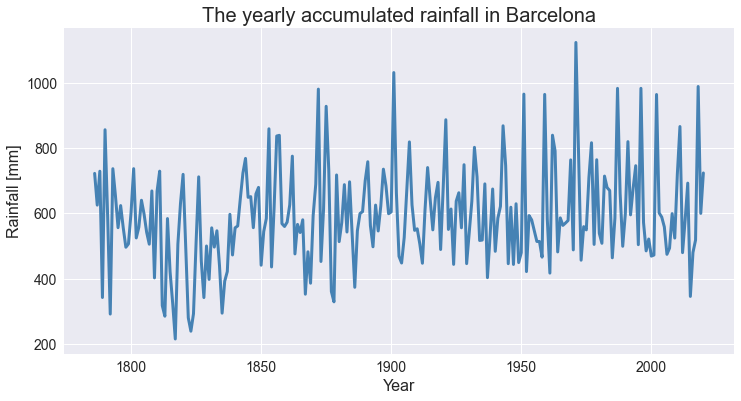

In [91]:
df_rainfall.plot(color = 'steelblue', linewidth=3, figsize=(12, 6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

plt.title('The yearly accumulated rainfall in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall [mm]', fontsize=16)

The simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.

In [92]:
df_temperature['SMA_10'] = df_temperature.average_temperature.rolling(10, min_periods=1).mean()
df_temperature['SMA_20'] = df_temperature.average_temperature.rolling(20, min_periods=1).mean()

df_rainfall['SMA_10'] = df_rainfall.accumulated_rainfall.rolling(10, min_periods=1).mean()
df_rainfall['SMA_20'] = df_rainfall.accumulated_rainfall.rolling(20, min_periods=1).mean()

Text(0, 0.5, 'Temperature [°C]')

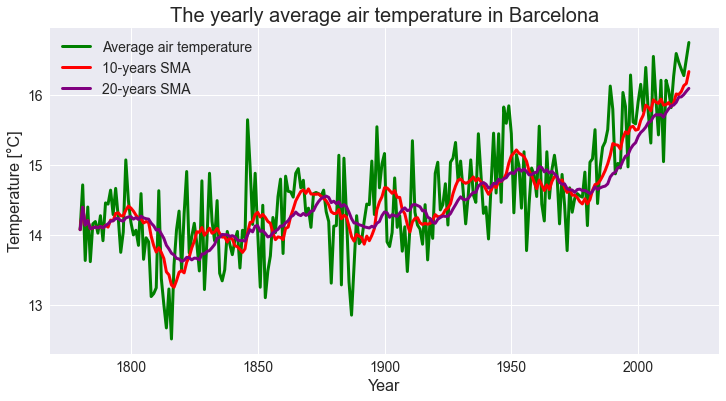

In [93]:
colors = ['green', 'red', 'purple']

df_temperature.plot(color = colors, linewidth=3, figsize=(12, 6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)

plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Text(0, 0.5, 'Rainfall [mm]')

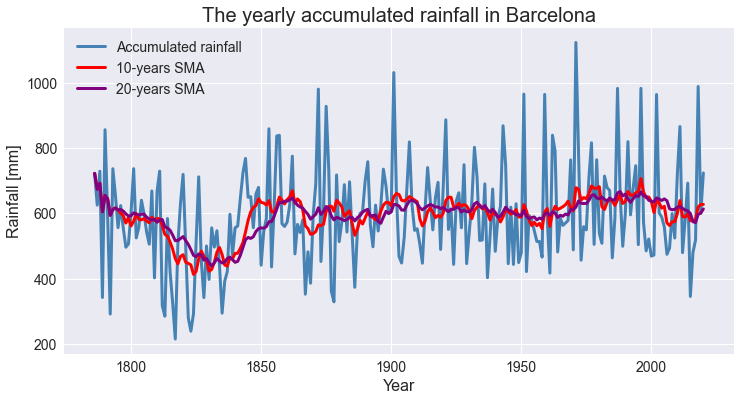

In [94]:
colors = ['steelblue', 'red', 'purple']

df_rainfall.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Accumulated rainfall', '10-years SMA', '20-years SMA'], fontsize=14)

plt.title('The yearly accumulated rainfall in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall [mm]', fontsize=16)

Lastly, I want to point out that you can use the rolling method together with other statistical functions. The following table shows some of the functions you can employ with the rolling method to compute rolling window calculations.

The simple moving average has a sliding window of constant size M. On the contrary, the window size becomes larger as the time passes when computing the cumulative moving average.

In [95]:
df_temperature['CMA'] = df_temperature.average_temperature.expanding().mean()

df_rainfall['CMA'] = df_rainfall.accumulated_rainfall.expanding().mean()

Text(0, 0.5, 'Temperature [°C]')

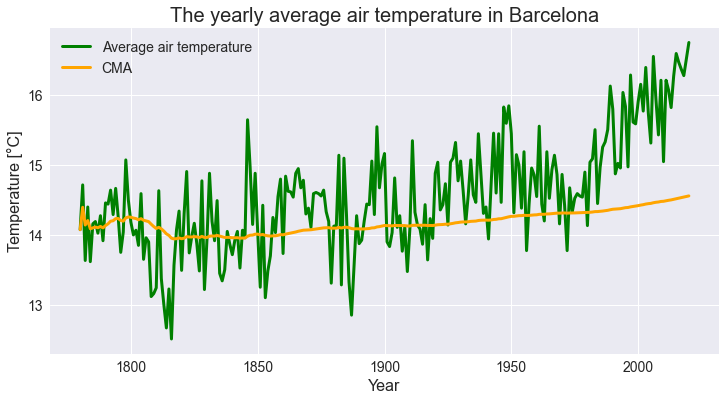

In [96]:
# colors for the line plot
colors = ['green', 'orange']

# line plot - the yearly average air temperature in Barcelona
df_temperature[['average_temperature', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', 'CMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Text(0, 0.5, 'Rainfall [mm]')

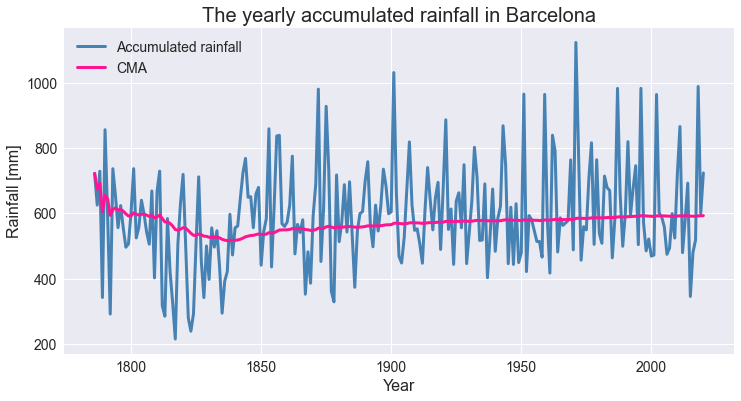

In [97]:
# colors for the line plot
colors = ['steelblue', 'deeppink']

# line plot - the yearly accumulated rainfall in Barcelona
df_rainfall[['accumulated_rainfall','CMA']].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Accumulated rainfall', 'CMA'], fontsize=14)

# title and labels
plt.title('The yearly accumulated rainfall in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall [mm]', fontsize=16)

The cumulative moving average takes into account all the preceding values when calculating the average. For this reason, they are a bad option to analyze trends, especially with long time series. The simple moving average works better for this purpose. However, all data points are equally weighted. To highlight recent observations, we can use the exponential moving average which applies more weight to the most recent data points, reacting faster to changes.


The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

In [98]:
# smoothing factor - 0.1
df_temperature['EMA_0.1'] = df_temperature.average_temperature.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
df_temperature['EMA_0.3'] = df_temperature.average_temperature.ewm(alpha=0.3, adjust=False).mean()

# rainfall
# smoothing factor - 0.1
df_rainfall['EMA_0.1'] = df_rainfall.accumulated_rainfall.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
df_rainfall['EMA_0.3'] = df_rainfall.accumulated_rainfall.ewm(alpha=0.3, adjust=False).mean()

Text(0, 0.5, 'Temperature [°C]')

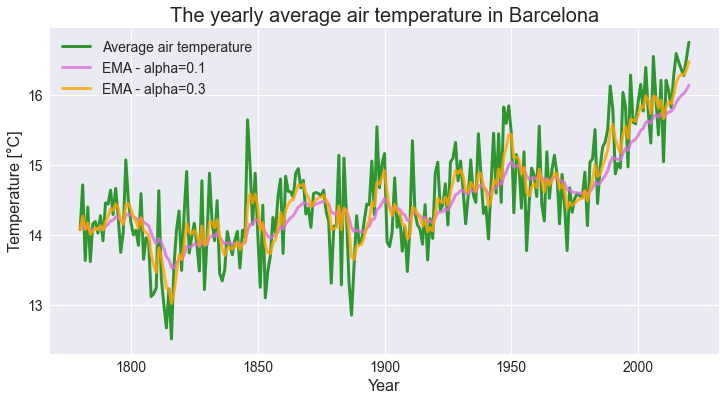

In [99]:
# colors for the line plot
colors = ['green', 'orchid', 'orange']

# line plot - the yearly average air temperature in Barcelona
df_temperature[['average_temperature', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Text(0, 0.5, 'Rainfall [mm]')

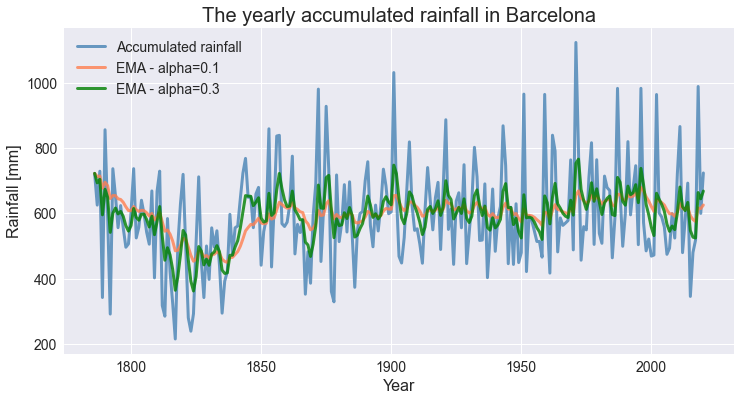

In [100]:
# colors for the line plot
colors = ['steelblue', 'coral', 'green']

# line plot - the yearly accumulated rainfall in Barcelona
df_rainfall[['accumulated_rainfall', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Accumulated rainfall', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly accumulated rainfall in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall [mm]', fontsize=16)

[참조해볼만한글](https://www.investopedia.com/ask/answers/122314/why-moving-average-ma-important-traders-and-analysts.asp)